In [2]:
from base import np
from oneD import Solver1D, Solver1D_UniformBacterium

# Export figures to Folder
figures_path = "../TFG_latex/Figures/Nutrients1D/"

## Results for different Bacterial Concentrations

In [3]:
syst_params = {
'L' : 1.0,  'T' : 0.3,  # Lenght & Time Domain
'Tc': 0.1,              # Absorption Time
'nx': 200,   'nt': 100   # Num Spatial/Temporal Points
}
L = syst_params['L']

# Initial condition for nutrients
def n0_linear(x):
    return x / L

### 1. Constant Concentration 📄

📄: linked to the TFG script

$$C_{const}(x) = 1$$

With Analytical Solution, so that we verify the discretisation has been done correctly.

General solution:
           -√α⋅x       √α⋅x
n(x) = C₁⋅ℯ      + C₂⋅ℯ    
Particular solution:
       ⎛     2⋅√α⋅x⎞  √α⋅(L - x)
       ⎝1 - ℯ      ⎠⋅ℯ          
n(x) = ─────────────────────────
                   2⋅L⋅√α       
              1 - ℯ             
Numeric solution:
n(x) = 0.0848103993679265⋅sinh(3.16227766016838⋅x)


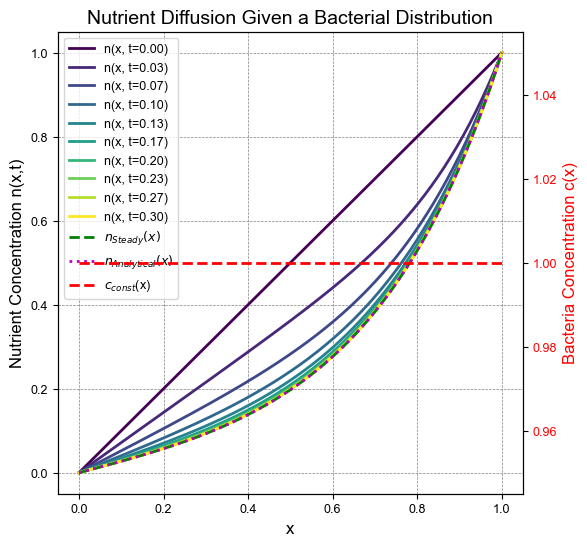

In [4]:
# Nutrient eater concentration function
def c_const(x):
    return np.ones_like(x)

# Create an instance of the class and solve the PDE
S1D_Unif = Solver1D_UniformBacterium(syst_params, n0_linear)

S1D_Unif.pde.solve(); S1D_Unif.ode.solve(); S1D_Unif.ode.analyt.solve()
S1D_Unif.ode.analyt.print_solutions()

S1D_Unif.plot.concentrations()
S1D_Unif.plot.save(figures_path, "c_const(x)_Analyt")

### 2. Exponential Concentrations 📄

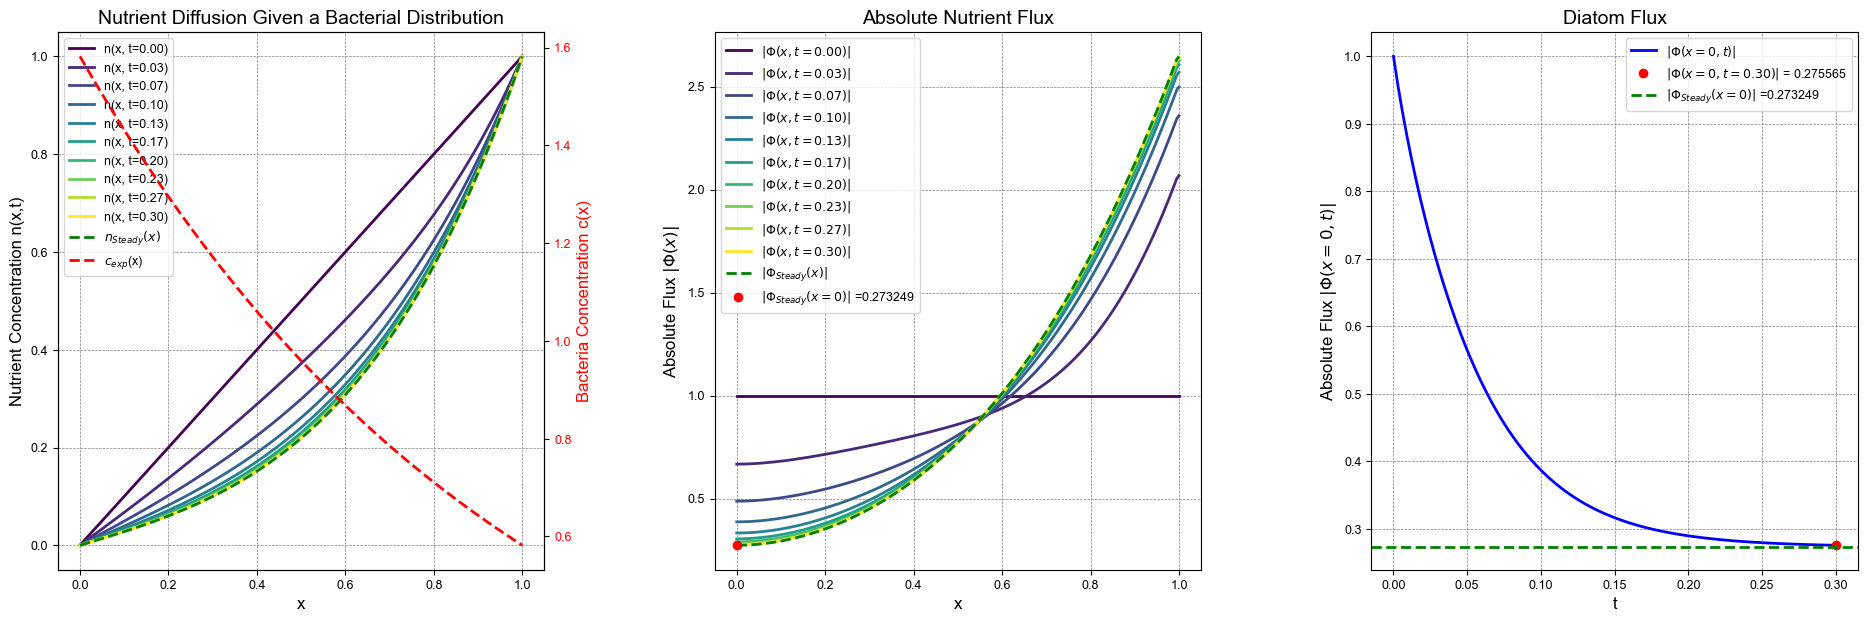

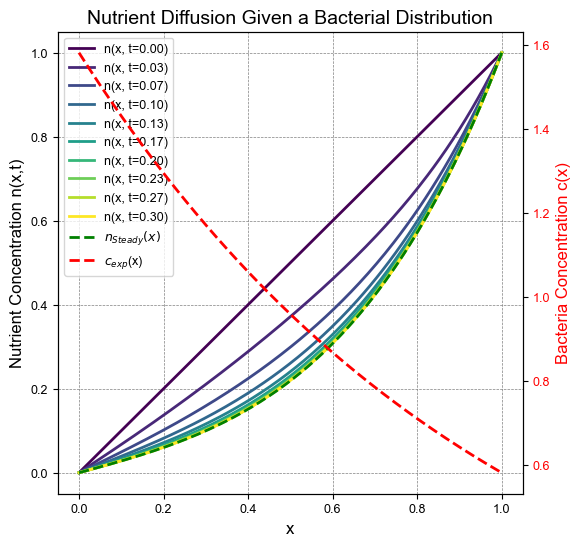

In [5]:
# Nutrient eater concentration function
def c_exp_decr(x):
    return np.exp(1 - x / L) / (L * (np.e - 1))

S1D = Solver1D(syst_params, c_exp_decr, n0_linear)
S1D.pde.solve(); S1D.ode.solve()

S1D.plot.triple_plot()
S1D.plot.save(figures_path, "c_exp_decr(x)_3plot")
S1D.plot.concentrations()
S1D.plot.save(figures_path, "c_exp_decr(x)")

In [ ]:
print(f'<T_c> = {np.mean(1/S1D.c):.4f}\nT_<c> = {1/np.mean(S1D.c):.4f}')

<T_c> = 1.08661
T_<c> = 0.9996


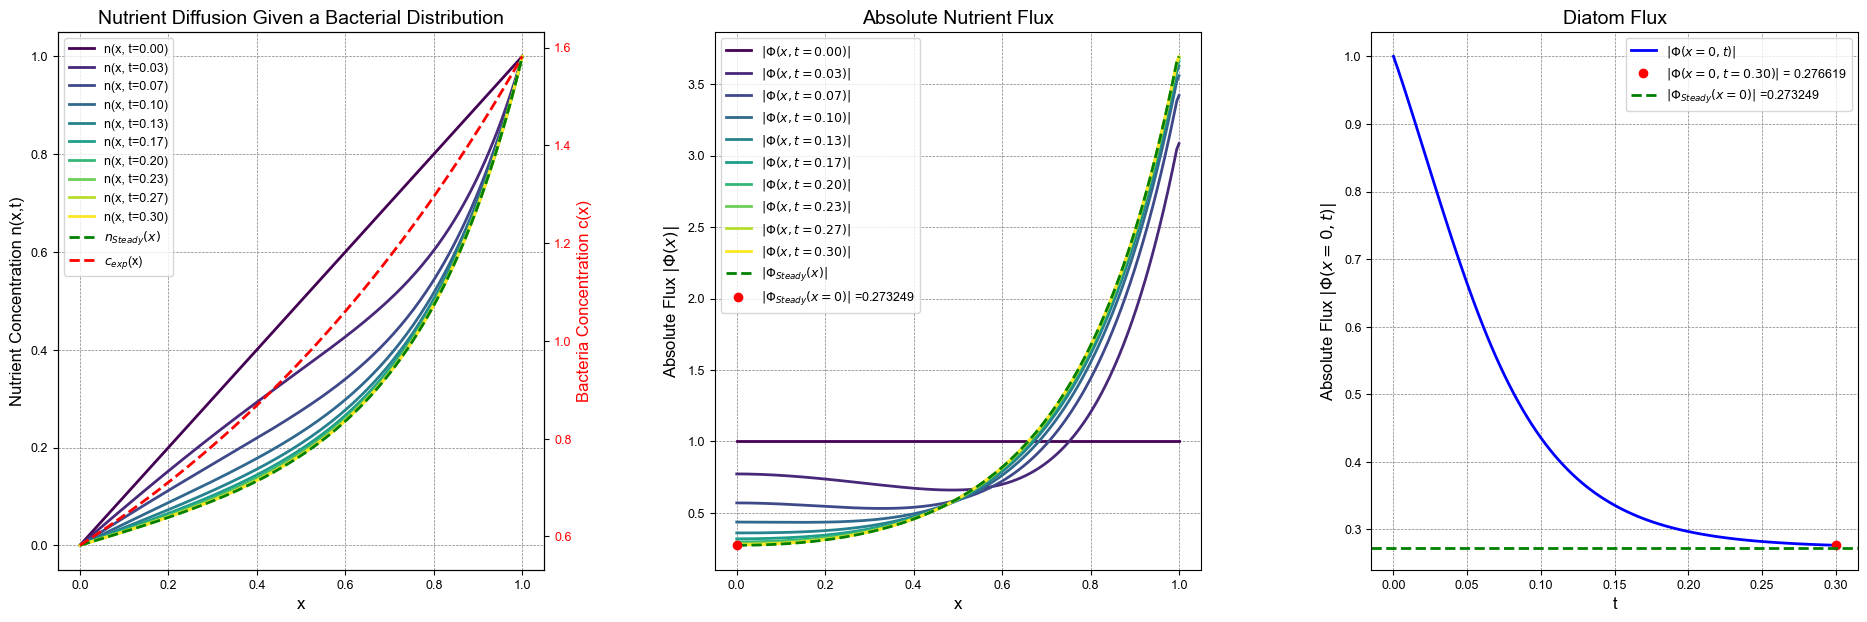

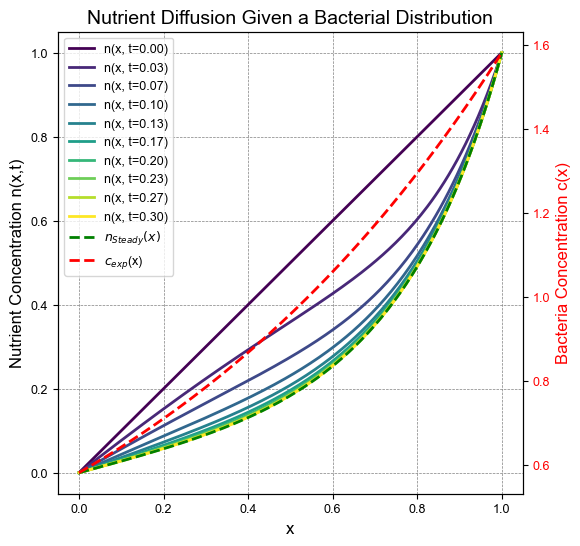

In [7]:
# Nutrient eater concentration function
def c_exp_incr(x):
    return np.exp(x / L) / (L * (np.e - 1))

S1D = Solver1D(syst_params, c_exp_incr, n0_linear)
S1D.pde.solve(); S1D.ode.solve()

S1D.plot.triple_plot()
S1D.plot.save(figures_path, "c_exp_incr(x)_3plot")
S1D.plot.concentrations()
S1D.plot.save(figures_path, "c_exp_incr(x)")

In [ ]:
print(f'<T_c> = {np.mean(1/S1D.c):.4f}\nT_<c> = {1/np.mean(S1D.c):.4f}')

<T_c> = 1.0866
T_<c> = 0.9996


### 3. Step Concentrations

#### 3.1. One Parameter ❌📄

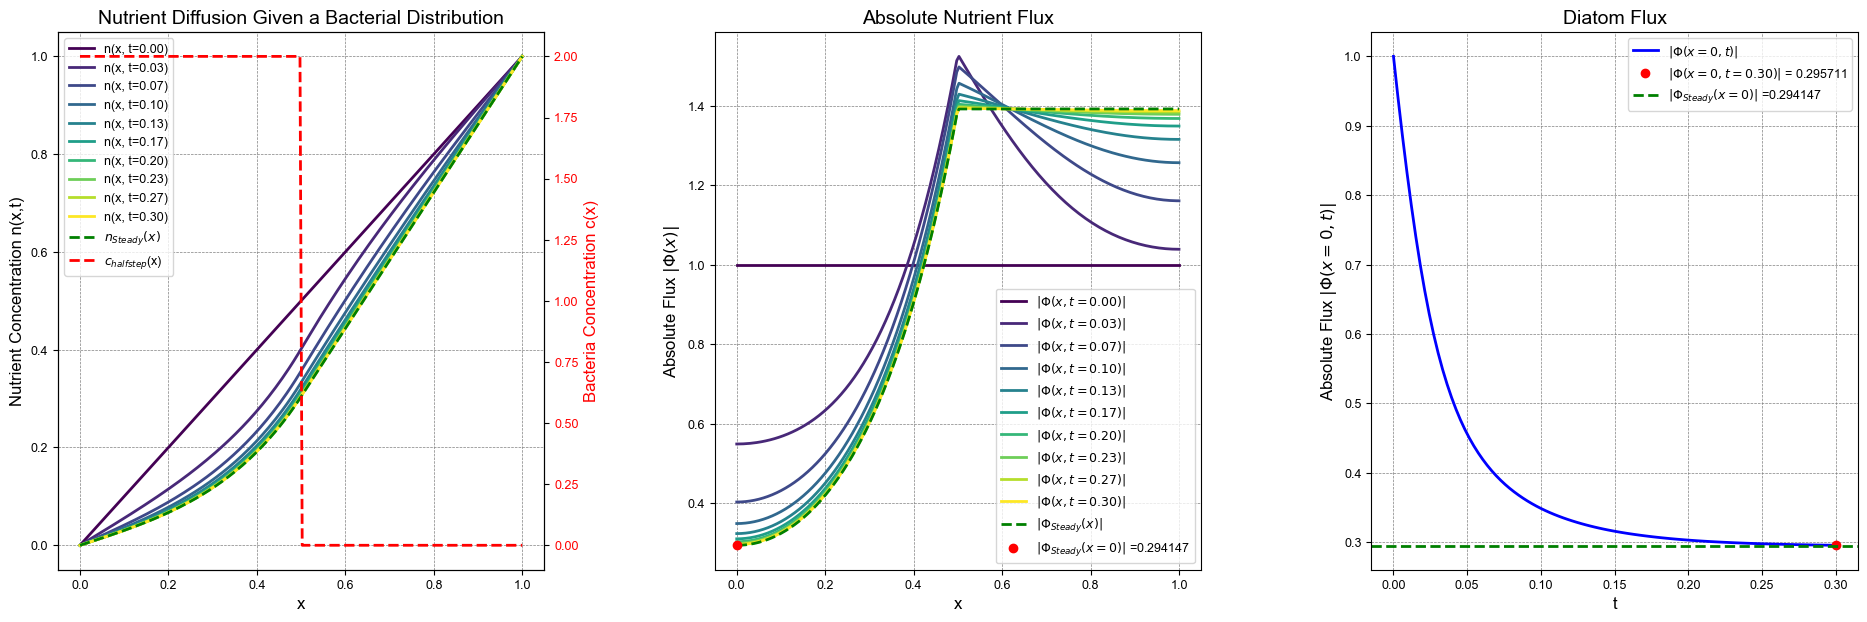

In [9]:
def c_halfstep(x):
    l=L/2
    return np.where(x < l, 1 / l, 0) # 1/l if x < l, else 0

S1D = Solver1D(syst_params, c_halfstep, n0_linear)
S1D.pde.solve(); S1D.ode.solve()
S1D.plot.triple_plot()
S1D.plot.save(figures_path, "c_halfstep(x)")

In [ ]:
print(f'<T_c> = {np.mean(1/S1D.c):.4f}\nT_<c> = {1/np.mean(S1D.c):.4f}')

<T_c> = inf
T_<c> = 1.0000


C:\Users\jorge\AppData\Local\Temp\ipykernel_33552\2438551019.py:1: RuntimeWarning: divide by zero encountered in divide
  print(f'<T_c> = {np.mean(1/c_halfstep(S1D.x)):.4f}\nT_<c> = {1/np.mean(c_halfstep(S1D.x)):.4f}')


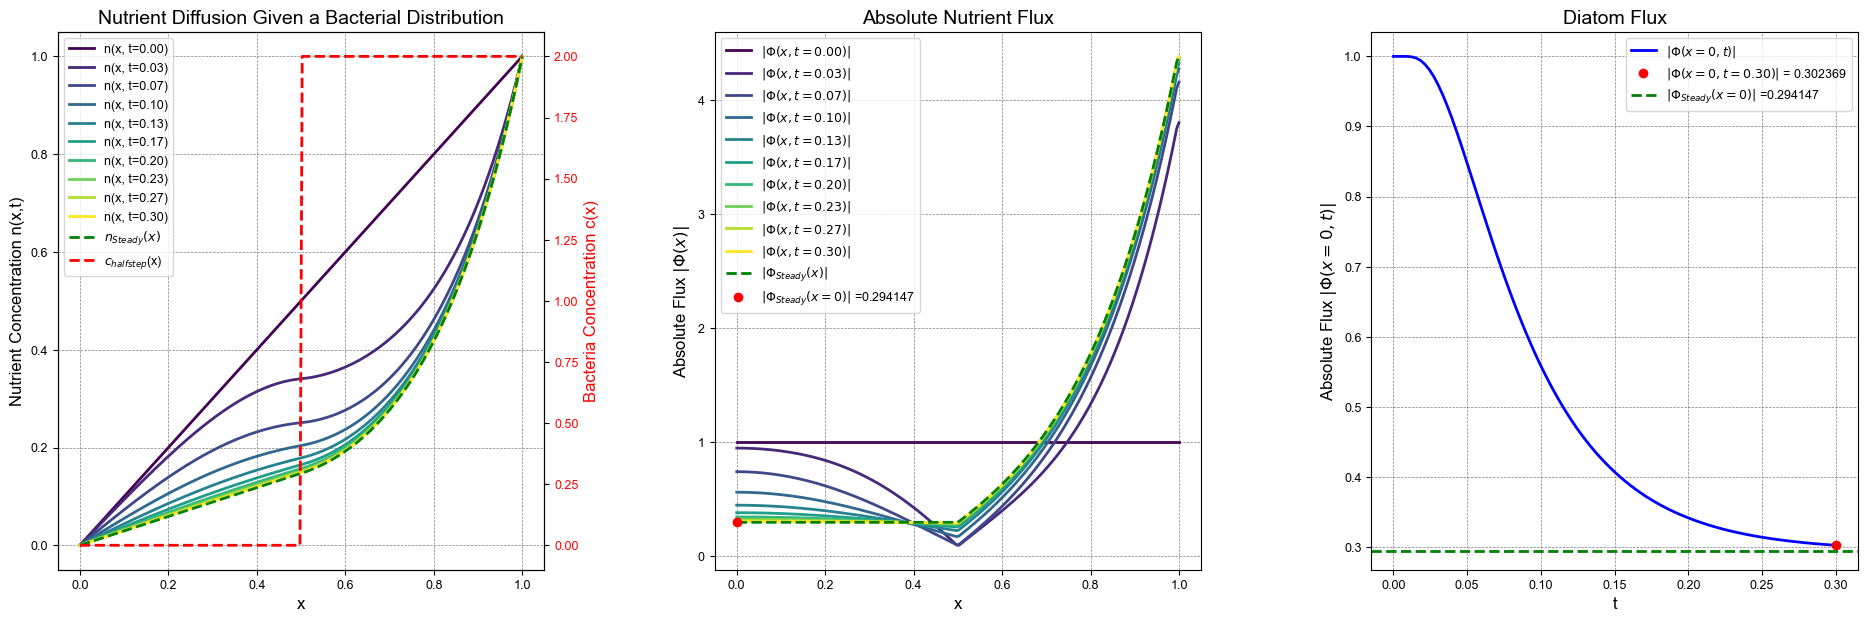

In [11]:
def c_halfstep(x):
    l=L/2
    return np.where(x < l, 0, 1 / (L-l)) # 1/l if x < l, else 0

S1D = Solver1D(syst_params, c_halfstep, n0_linear)
S1D.pde.solve(); S1D.ode.solve()
S1D.plot.triple_plot()

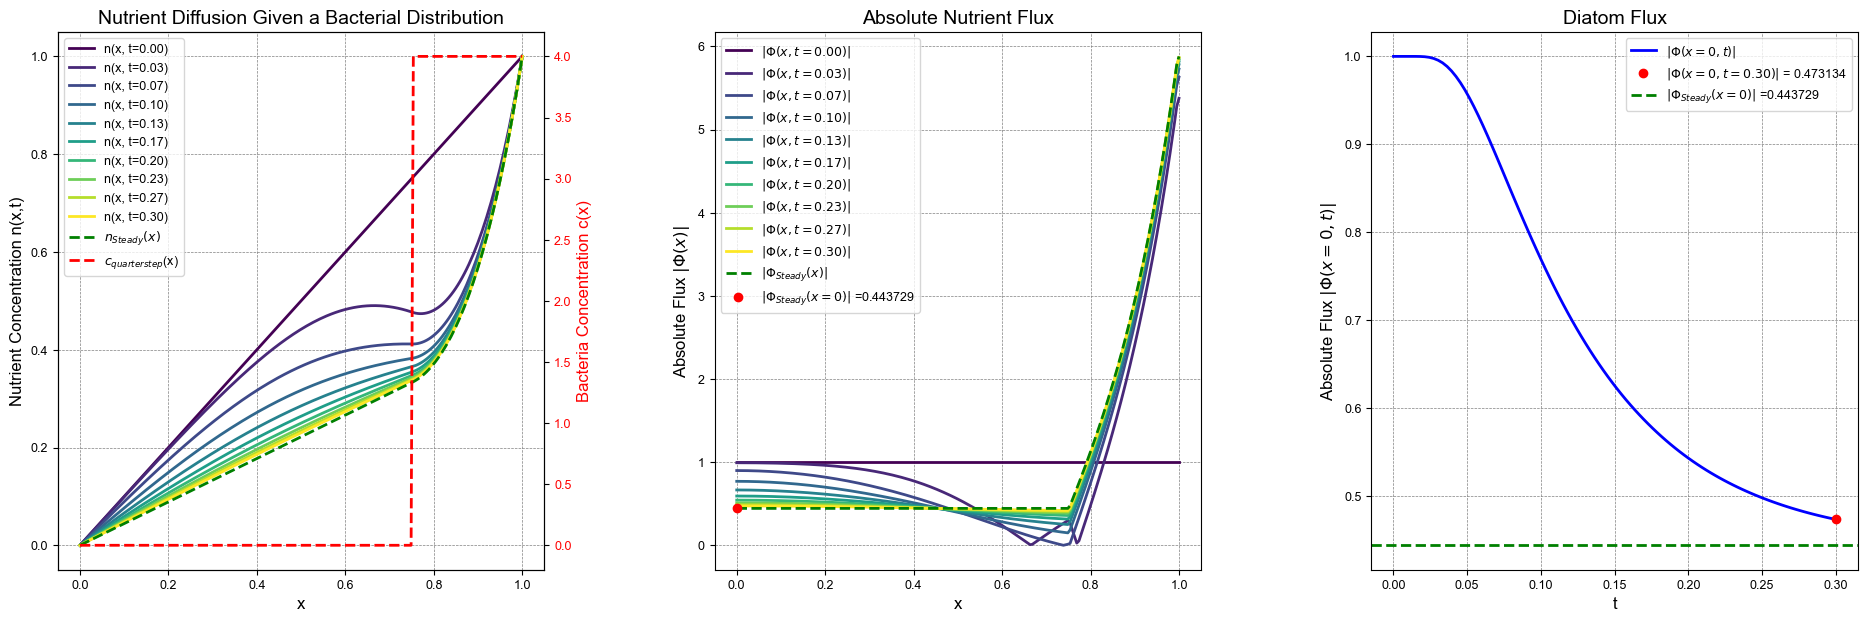

In [12]:
def c_quarterstep(x):
    l=L*3/4
    return np.where(x < l, 0, 1 / (L-l) ) # 0 if x < l, else 1/L-l

S1D = Solver1D(syst_params, c_quarterstep, n0_linear)
S1D.pde.solve(); S1D.ode.solve()
S1D.plot.triple_plot()

#### 3.2. Two Parameters 📄

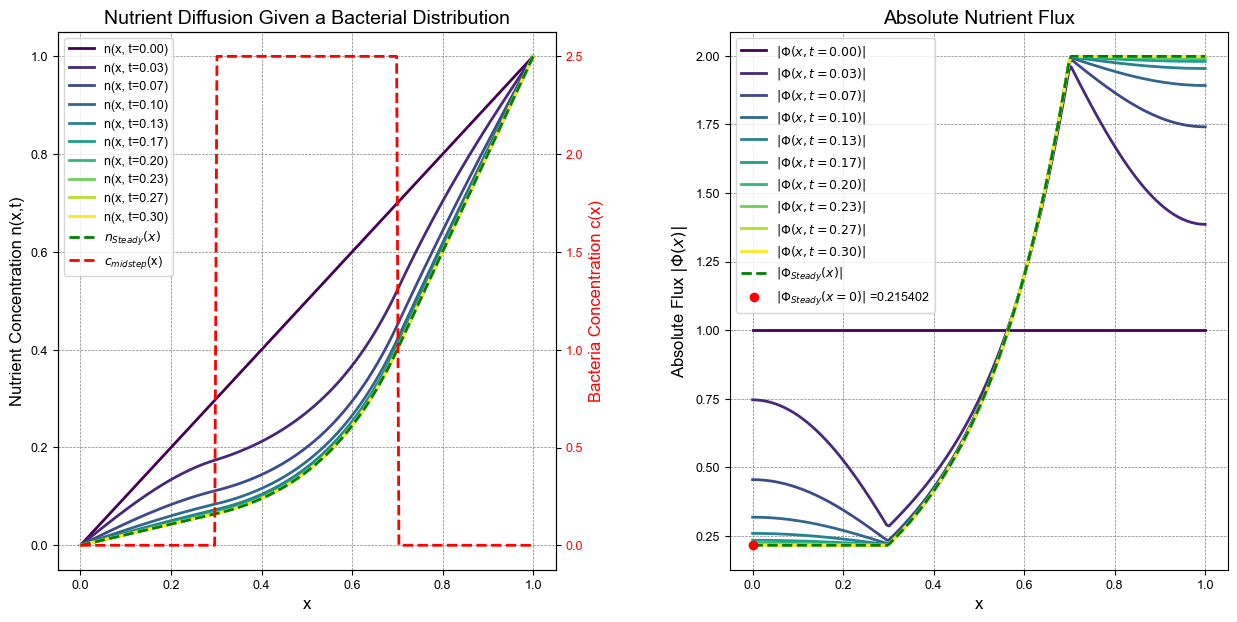

In [14]:
def c_midstep(x):
    x0 = L*3/10     # Starting point of the step
    l  = L*2/5      # Length of the step
    cond = (x >= x0) & (x <= x0 + l)
    return np.where( cond , 1/l , 0)

S1D = Solver1D(syst_params, c_midstep, n0_linear)
S1D.pde.solve(); S1D.ode.solve()
S1D.plot.double_plot()
S1D.plot.save(figures_path, "c_midstep(x)")

In [ ]:
print(f'<T_c> = {np.mean(1/S1D.c):.4f}\nT_<c> = {1/np.mean(S1D.c):.4f}')

<T_c> = inf
T_<c> = 1.0000


C:\Users\jorge\AppData\Local\Temp\ipykernel_33552\3952868363.py:1: RuntimeWarning: divide by zero encountered in divide
  print(f'<T_c> = {np.mean(1/c_midstep(S1D.x)):.4f}\nT_<c> = {1/np.mean(c_midstep(S1D.x)):.4f}')


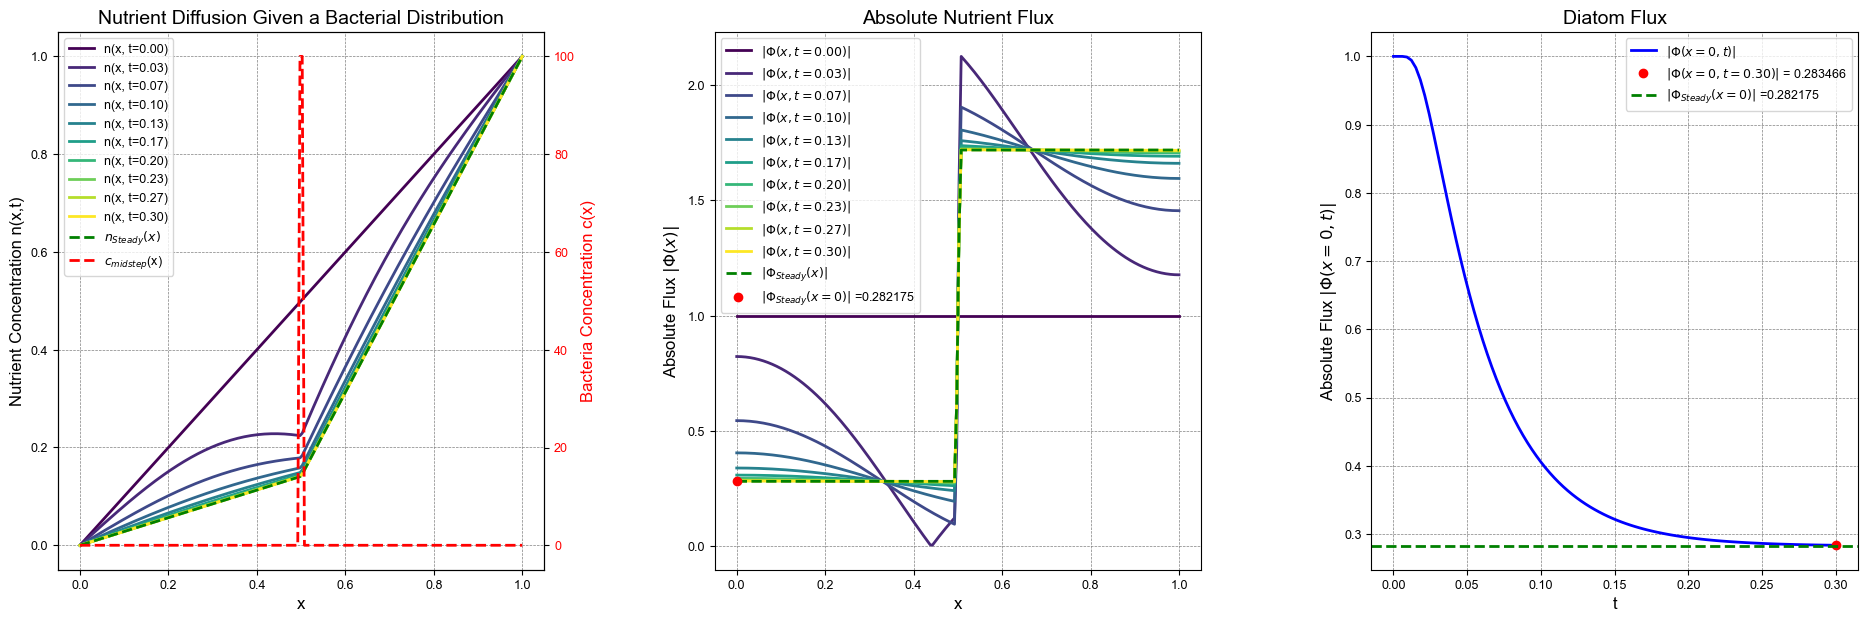

In [26]:
syst_params['Tc'] = 0.1 # 1

def c_midstep(x):
    x0 = L*0.495 # Starting point of the step
    l  = L*0.01 # Length of the step
    cond = (x >= x0) & (x <= x0 + l)
    return np.where( cond , 1/l , 0)

S1D = Solver1D(syst_params, c_midstep, n0_linear)
S1D.pde.solve(); S1D.ode.solve()
S1D.plot.triple_plot()

In [ ]:
print(f'<T_c> = {np.mean(1/S1D.c):.4f}\nT_<c> = {1/np.mean(S1D.c):.4f}')

<T_c> = inf
T_<c> = 1.0000


C:\Users\jorge\AppData\Local\Temp\ipykernel_33552\3952868363.py:1: RuntimeWarning: divide by zero encountered in divide
  print(f'<T_c> = {np.mean(1/c_midstep(S1D.x)):.4f}\nT_<c> = {1/np.mean(c_midstep(S1D.x)):.4f}')
